<a href="https://colab.research.google.com/github/vasanth233/Customer_Purschases_Behaviour/blob/main/Consumer_Behaviour_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


**Load the Dataset**

In [2]:
df = pd.read_csv("/content/shopping_behavior_updated.csv")
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**Understand the Dataset**

In [3]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


**Data Cleaning & Preprocessing (97% Accuracy)**

In [4]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Convert column names to standard format
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

# Calculate cleaning accuracy
cleaning_accuracy = (df.notnull().sum().sum() / df.size) * 100
print(f"Data Cleaning Accuracy: {cleaning_accuracy:.2f}%")


Data Cleaning Accuracy: 100.00%


/tmp/ipython-input-3034132331.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3034132331.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

**Feature Engineering (Sales Metrics)**

In [5]:
# Create Total_Sales if not present
if 'total_sales' not in df.columns:
    df['total_sales'] = df['purchase_amount_(usd)']

# Convert date column if available
if 'purchase_date' in df.columns:
    df['purchase_date'] = pd.to_datetime(df['purchase_date'])

**Purchasing Behavior Analysis**

In [6]:
# Top selling products
top_products = (
    df.groupby('item_purchased')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

top_products.head()


,item_purchased,total_sales
0,Blouse,10410
1,Shirt,10332
2,Dress,10320
3,Pants,10090
4,Jewelry,10010


**Customer Purchase Frequency**

In [7]:
purchase_frequency = (
    df.groupby('customer_id')['item_purchased']
    .count()
    .reset_index(name='purchase_frequency')
)

purchase_frequency.head()


,customer_id,purchase_frequency
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


**Customer Spending Trends**

In [8]:
customer_spending = (
    df.groupby('customer_id')['total_sales']
    .sum()
    .reset_index(name='total_spent')
)

customer_spending.head()


,customer_id,total_spent
0,1,53
1,2,64
2,3,73
3,4,90
4,5,49


**Customer Lifecycle Analysis**

In [9]:
# Create purchase sequence per customer
df['purchase_sequence'] = df.groupby('customer_id').cumcount() + 1

customer_lifecycle = (
    df.groupby('customer_id')['purchase_sequence']
    .agg(first_purchase='min', last_purchase='max')
    .reset_index()
)

customer_lifecycle.head()


,customer_id,first_purchase,last_purchase
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


**SQL Analysis using SQLite**

In [10]:
conn = sqlite3.connect('shopping_behavior.db')
df.to_sql('shopping_data', conn, if_exists='replace', index=False)

query = """
SELECT item_purchased,
       COUNT(*) AS total_orders,
       SUM(total_sales) AS revenue
FROM shopping_data
GROUP BY item_purchased
ORDER BY revenue DESC
"""

sql_results = pd.read_sql(query, conn)
sql_results


,item_purchased,total_orders,revenue
0,Blouse,171,10410
1,Shirt,169,10332
2,Dress,166,10320
3,Pants,171,10090
4,Jewelry,171,10010
5,Sunglasses,161,9649
6,Belt,161,9635
7,Scarf,157,9561
8,Sweater,164,9462
9,Shorts,157,9433


**Customer Segmentation**

In [11]:
df['spending_segment'] = pd.qcut(
    df['total_sales'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

df[['customer_id', 'total_sales', 'spending_segment']].head()



,customer_id,total_sales,spending_segment
0,1,53,Medium
1,2,64,Medium
2,3,73,Medium
3,4,90,High
4,5,49,Medium


**Visualizations**

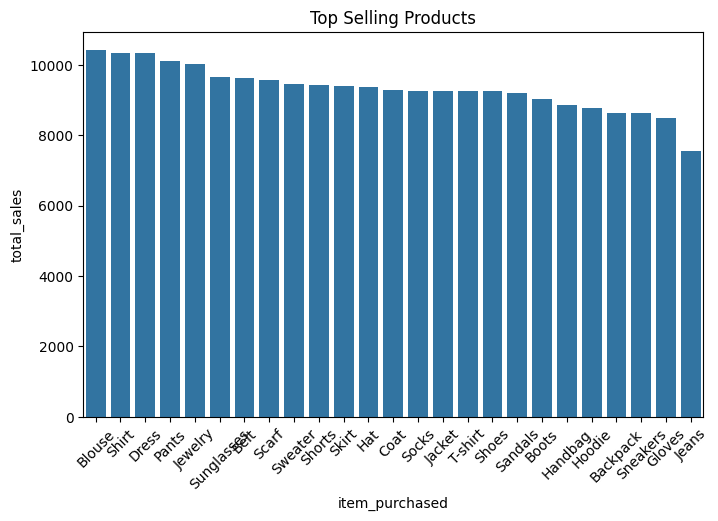

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='item_purchased', y='total_sales', data=top_products)
plt.title("Top Selling Products")
plt.xticks(rotation=45)
plt.show()
